<h1>Tестовое задание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Загрузим-датасет-и-оценим-его-визуально" data-toc-modified-id="Загрузим-датасет-и-оценим-его-визуально-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузим датасет и оценим его визуально</a></span></li><li><span><a href="#Оценим-распределения-признаков-и-визуализируем-их" data-toc-modified-id="Оценим-распределения-признаков-и-визуализируем-их-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценим распределения признаков и визуализируем их</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-первой-гипотезы" data-toc-modified-id="Проверка-первой-гипотезы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка первой гипотезы</a></span></li><li><span><a href="#Вывод-для-первой-гипотезы" data-toc-modified-id="Вывод-для-первой-гипотезы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод для первой гипотезы</a></span></li><li><span><a href="#Проверка-второй-гипотезы" data-toc-modified-id="Проверка-второй-гипотезы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверка второй гипотезы</a></span></li><li><span><a href="#Вывод-для-второй-гипотезы" data-toc-modified-id="Вывод-для-второй-гипотезы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод для второй гипотезы</a></span></li></ul></li></ul></div>

### Импортируем библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Загрузим датасет и оценим его визуально

!!! Уточнение по загрузке тестового датасета - для того, чтобы ридер его корректно прочитал, необходимо было удалить кавычки для больничных дней, пола и возраста сотрудников (сделал с помощью блокнота). Иными словами в ноутбуке и при загрузке для проверки в streamlit используйте исправленный файл, который я положил в репозиторий на git вместе с выполненным тестовым заданием, исходный (оригинальный) файл работать не будет. 

In [7]:
df = pd.read_csv('C:/Users/cfo_m/Datasets/Данные_к_ТЗ.csv', encoding='cp1251')
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


### Оценим распределения признаков и визуализируем их

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Количество больничных дней,237.0,3.257384,1.807821,0.0,2.0,3.0,4.0,8.0
Возраст,237.0,40.181435,6.875157,23.0,36.0,41.0,45.0,60.0


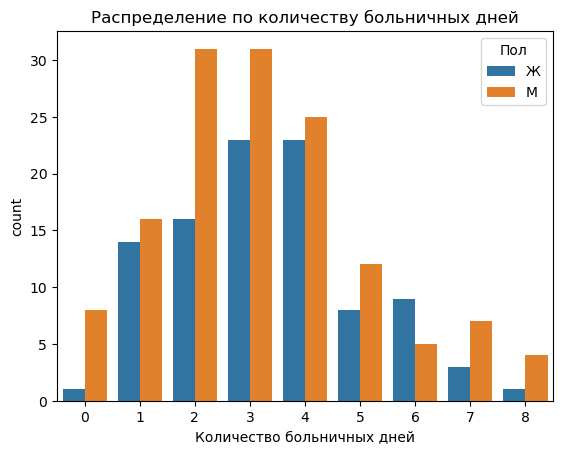

In [6]:
plt.title('Распределение по количеству больничных дней')
sns.countplot(data=df, x="Количество больничных дней", hue = 'Пол');

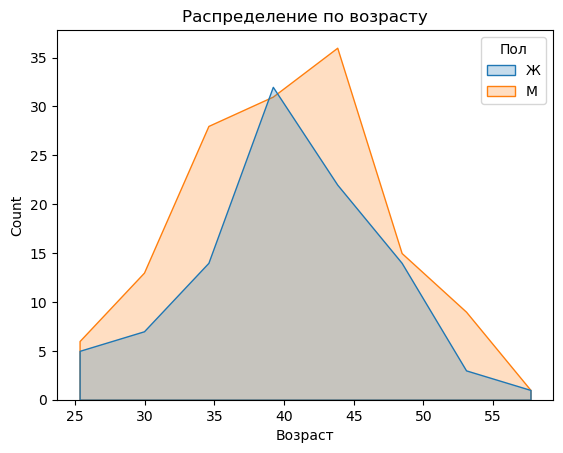

In [7]:
plt.title('Распределение по возрасту')
sns.histplot(data=df, x="Возраст", hue = 'Пол',  element="poly", bins=8);

### Проверка гипотез

#### Проверка первой гипотезы

In [8]:
df['Пропустил больше 2 дней'] = (df['Количество больничных дней']>2).astype(int)

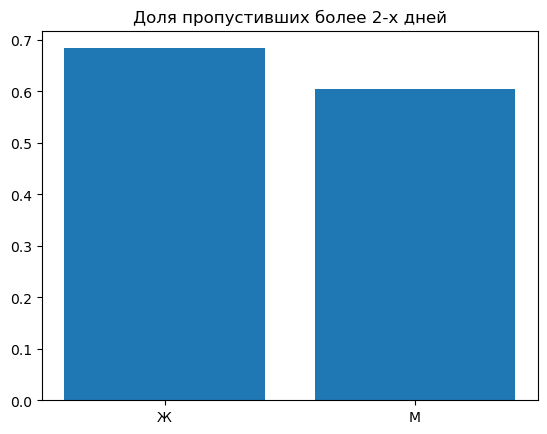

In [9]:
df_1 = df.groupby('Пол')['Пропустил больше 2 дней'].mean()

plt.title('Доля пропустивших более 2-x дней')
plt.bar(df_1.index, df_1);

В нашей выборке женщины чаще пропускают более 2-х рабочих дней.

Для проверки гипотезы используем ассимптотический z-test (для больших выборок эквивалентно t-test с равными дисперсиями)

Уровень значимости примем за 0.05
- H0: мужчины пропускают более 2-x рабочих дней не чаще женщин.
- H1: мужчины пропускают более 2-x рабочих дней чаще женщин.

In [10]:
rvs_M = df.loc[df['Пол'] == 'М', 'Пропустил больше 2 дней']
rvs_F = df.loc[df['Пол'] == 'Ж', 'Пропустил больше 2 дней']

statistic, pvalue = stats.ttest_ind(rvs_M, rvs_F, alternative='greater')

In [11]:
print('Статистика: ', round(statistic, 3))
print('pvalue: ', round(pvalue, 3))

Статистика:  -1.25
pvalue:  0.894


#### Вывод для первой гипотезы

Так как pvalue больше уровня значимости, делаем вывод, что мужчины пропускают более 2-x рабочих дней не чаще женщин.

#### Проверка второй гипотезы

In [12]:
df['Работник старше 35 лет'] = (df['Возраст']>35).replace({True:'старше 35 лет', False:'не старше 35 лет'})

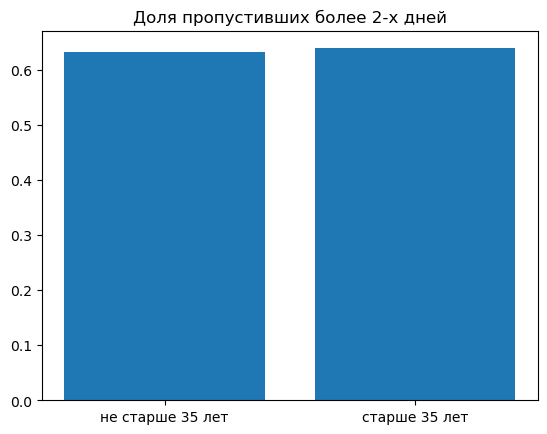

In [17]:
df_2 = df.groupby('Работник старше 35 лет')['Пропустил больше 2 дней'].mean()

plt.title('Доля пропустивших более 2-x дней')
plt.bar(df_2.index, df_2);

В нашей выборке люди старше 35 лет чаще пропускают более 2-х рабочих дней.

Для проверки гипотезы используем ассимптотический z-test (для больших выборок эквивалентно t-test с равными дисперсиями)

Уровень значимости примем за 0.05
- H0: люди старше 35 лет пропускают более 2-x рабочих дней не чаще своих молодых коллег
- H1: люди старше 35 лет пропускают более 2-x рабочих дней чаще своих молодых коллег

In [18]:
rvs_st = df.loc[df['Работник старше 35 лет'] == 'старше 35 лет', 'Пропустил больше 2 дней']
rvs_ml = df.loc[df['Работник старше 35 лет'] == 'не старше 35 лет', 'Пропустил больше 2 дней']

statistic, pvalue = stats.ttest_ind(rvs_st, rvs_ml, alternative='greater')

In [15]:
print('Статистика: ', round(statistic, 3))
print('pvalue: ', round(pvalue, 3))

Статистика:  0.1
pvalue:  0.46


#### Вывод для второй гипотезы

Так как pvalue больше уровня значимости, делаем вывод, что люди старше 35 лет пропускают более 2-x рабочих дней не чаще своих молодых коллег.